In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [21]:
# Read Preprocessed Datasets
train = pd.read_csv('bitcoin_training_dataset.csv')
test = pd.read_csv('bitcoin_test_dataset.csv')

In [22]:
train.head()

,length,weight,neighbors,income,looped,count,label
0,-1.299557,1.125138,0.491081,1.158460,-0.369852,-0.736724,1
1,0.604720,-0.215589,-1.262735,0.605557,-0.369852,-0.736724,1
2,1.337555,-1.247277,0.491081,1.087439,2.921793,1.642914,0
3,-0.645990,1.125138,-1.262735,-0.198988,-0.369852,-0.736724,0
4,-0.645990,1.738996,0.491081,1.060666,-0.369852,-0.327623,1


In [23]:
test.head()

,length,weight,neighbors,income,looped,count,label
0,1.080547,-1.245423,2.209168,1.838642,1.763154,0.223435,1
1,1.337555,-1.246783,0.491081,-0.116951,-0.369852,1.681723,1
2,1.337555,-1.242081,0.491081,-1.280556,2.921817,1.667355,0
3,0.718232,1.139978,1.735029,1.536607,-0.369852,0.959264,1
4,0.357237,0.413658,0.491081,-0.094593,-0.369852,-0.736724,0


In [25]:
# Splitting the dataset into the X and y
target = 'label'

X_train = train.drop(columns=[target])
y_train = train[target]

X_test = test.drop(columns=[target])
y_test = test[target]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(66202, 6) (16566, 6)
(66202,) (16566,)


In [26]:
# Implementation of Random Forest Classifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15, 20, 30],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parms found: ", best_params)




Fitting 3 folds for each of 810 candidates, totalling 2430 fits


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
429 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Best parms found:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [31]:
# Print the best parameters
for param, value in best_params.items():
    print(f"{param}: {value}")

bootstrap: True
max_depth: 30
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 200


In [41]:
# change max_depth
best_params['max_depth'] = 30

Accuracy:  0.7381383556682362
Precision:  0.731016731016731
Recall:  0.7539519729697116
F1:  0.7423072353570156


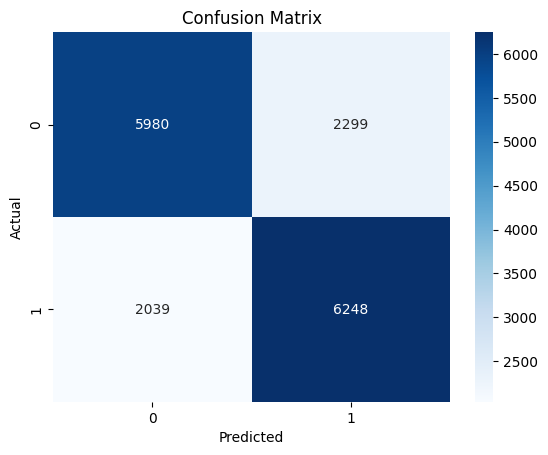

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      8279
           1       0.73      0.75      0.74      8287

    accuracy                           0.74     16566
   macro avg       0.74      0.74      0.74     16566
weighted avg       0.74      0.74      0.74     16566



In [42]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(**best_params)

# Fit the model
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)


In [30]:
# Cross Validation
print("Cross Validation: ", cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean())

Cross Validation:  0.7436633262381265
